<a href="https://colab.research.google.com/github/Md-Sanzid-Bin-Hossain/Kinetics-FM-DLR-Net-Estimating-Kinetics-in-multiple-locomotion-modes/blob/main/Sensor_Combination_Public_Dataset_2_kinetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import numpy
import tensorflow as tf
import statistics
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU,LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statistics import stdev
import math
import h5py

import numpy as np

from scipy.signal import butter,filtfilt

import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
import pandas
import matplotlib.pyplot as plt

## for Deep-learing:
import tensorflow.keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
to_categorical([0, 1, 2, 3], num_classes=4)
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import np_utils
import itertools
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Bidirectional
#import constraint

from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2


###  Library for attention layers

import pandas as pd
#import pyarrow.parquet as pq # Used to read the data
import os
import numpy as np
from tensorflow.keras.layers import * # Keras is the most friendly Neural Network library, this Kernel use a lot of layers classes
from tensorflow.keras.models import Model
#from tqdm import tqdm # Processing time measurement
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K # The backend give us access to tensorflow operations and allow us to create the Attention class
from tensorflow.keras import optimizers # Allow us to access the Adam class to modify some parameters
from sklearn.model_selection import GridSearchCV, StratifiedKFold # Used to use Kfold to train our model
from tensorflow.keras.callbacks import * # This object helps the model to train in a smarter way, avoiding overfitting

from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
import statistics
import gc



### Early stopping

from tensorflow.keras.callbacks import EarlyStopping



config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


from google.colab import drive
drive.mount('/content/drive',force_remount=True)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1889247394592597855
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16863610455624293160
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
Mounted at /content/drive


# File path


In [ ]:
main_dir = "/content/drive/My Drive/public dataset/Public_dataset_2/Subject01"
# os.mkdir(main_dir)
path="/content/drive/My Drive/public dataset/Public_dataset_2/Subject01/"
subject='Subject_01'

# Data loader

In [ ]:
if __name__ == '__main__':
    with h5py.File('/content/drive/My Drive/public dataset/all_17_subjects.h5', 'r') as hf:
        data_all_sub = {subject: subject_data[:] for subject, subject_data in hf.items()}
        data_fields = json.loads(hf.attrs['columns'])

In [ ]:
def data_extraction(A):
  for k in range(len(A)):
    zero_index_1=np.all(A[k:k+1,:,:] == 0, axis=0)
    zero_index = np.multiply(zero_index_1, 1)
    zero_index=np.array(zero_index)

    for i in range(len(zero_index)):
      if (sum(zero_index[i])==256):
        index=i
        break;
    # print(index)
    B=A[k:k+1,20:index,:]
    C_1=B.reshape((B.shape[0]*B.shape[1],B.shape[2]))
    if (k==0):
      C=C_1
    else:
      C=np.append(C,C_1,axis=0)

  index_1 = data_fields.index('AccelX_R_FOOT')
  index_2 = data_fields.index('AccelY_R_FOOT')
  index_3 = data_fields.index('AccelZ_R_FOOT')
  index_4 = data_fields.index('GyroX_R_FOOT')
  index_5 = data_fields.index('GyroY_R_FOOT')
  index_6 = data_fields.index('GyroZ_R_FOOT')
  index_7 = data_fields.index('AccelX_R_SHANK')
  index_8 = data_fields.index('AccelY_R_SHANK')
  index_9 = data_fields.index('AccelZ_R_SHANK')
  index_10 = data_fields.index('GyroX_R_SHANK')
  index_11 = data_fields.index('GyroY_R_SHANK')
  index_12 = data_fields.index('GyroZ_R_SHANK')
  index_13 = data_fields.index('AccelX_R_THIGH')
  index_14 = data_fields.index('AccelY_R_THIGH')
  index_15 = data_fields.index('AccelZ_R_THIGH')
  index_16 = data_fields.index('GyroX_R_THIGH')
  index_17= data_fields.index('GyroY_R_THIGH')
  index_18 = data_fields.index('GyroZ_R_THIGH')
  index_19 = data_fields.index('EXT_KM_X')
  index_20 = data_fields.index('EXT_KM_Y')
  index_21 = data_fields.index('plate_2_force_x')
  index_22 = data_fields.index('plate_2_force_y')
  index_23 = data_fields.index('plate_2_force_z')
  index_24 = data_fields.index('body weight')
  index_25 = data_fields.index('body height')

  BW=(C[0:1, index_24]*9.8)
  BWH=(C[0:1, index_24]*9.8)*C[:, index_25]

  D=np.vstack((C[:, index_1],C[:, index_2],C[:, index_3],C[:, index_4],C[:, index_5],C[:, index_6],C[:, index_7],C[:, index_8],
              C[:, index_9],C[:, index_10],C[:, index_11],C[:, index_12],C[:, index_13],C[:, index_14]
              ,C[:, index_15],C[:, index_16],C[:, index_17],C[:, index_18],C[:, index_19],C[:, index_20],-C[:, index_21]/BW,
              -C[:, index_23]/BW,-C[:, index_22]/BW)).T

  return D

In [ ]:
data_subject_01 = data_all_sub['subject_01']
data_subject_02 = data_all_sub['subject_02']
data_subject_03 = data_all_sub['subject_03']
data_subject_04 = data_all_sub['subject_04']
data_subject_05 = data_all_sub['subject_05']
data_subject_06 = data_all_sub['subject_06']
data_subject_07 = data_all_sub['subject_07']
data_subject_08 = data_all_sub['subject_08']
data_subject_09 = data_all_sub['subject_09']
data_subject_10 = data_all_sub['subject_10']
data_subject_11 = data_all_sub['subject_11']
data_subject_12 = data_all_sub['subject_12']
data_subject_13 = data_all_sub['subject_13']
data_subject_14 = data_all_sub['subject_14']
data_subject_15 = data_all_sub['subject_15']
data_subject_16 = data_all_sub['subject_16']
data_subject_17 = data_all_sub['subject_17']


subject_1=data_extraction(data_subject_01)
subject_2=data_extraction(data_subject_02)
subject_3=data_extraction(data_subject_03)
subject_4=data_extraction(data_subject_04)
subject_5=data_extraction(data_subject_05)
subject_6=data_extraction(data_subject_06)
subject_7=data_extraction(data_subject_07)
subject_8=data_extraction(data_subject_08)
subject_9=data_extraction(data_subject_09)
subject_10=data_extraction(data_subject_10)
subject_11=data_extraction(data_subject_11)
subject_12=data_extraction(data_subject_12)
subject_13=data_extraction(data_subject_13)
subject_14=data_extraction(data_subject_14)
subject_15=data_extraction(data_subject_15)
subject_16=data_extraction(data_subject_16)
subject_17=data_extraction(data_subject_17)


# Data processing and model Training

In [ ]:
train_dataset=np.concatenate((subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,
                              subject_10,subject_11,subject_12,subject_13,subject_14,subject_15,subject_16,subject_17),axis=0)

test_dataset=subject_1

In [ ]:
# Train features #
from sklearn.preprocessing import StandardScaler

x_train=train_dataset[:,0:18]
scale= StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
train_X_1_1=x_train

# # Test features #
x_test=test_dataset[:,0:18]
test_X_1_1=x_test


  ### Label ###

train_y_1_1=train_dataset[:,18:23]
test_y_1_1=test_dataset[:,18:23]

train_dataset_1=np.concatenate((train_X_1_1,train_y_1_1),axis=1)
test_dataset_1=np.concatenate((test_X_1_1,test_y_1_1),axis=1)

train_dataset_1=pd.DataFrame(train_dataset_1)
test_dataset_1=pd.DataFrame(test_dataset_1)

train_dataset_1.dropna(axis=0,inplace=True)
test_dataset_1.dropna(axis=0,inplace=True)

train_dataset_1=np.array(train_dataset_1)
test_dataset_1=np.array(test_dataset_1)

train_dataset_sum = np. sum(train_dataset_1)
array_has_nan = np. isnan(train_dataset_sum)

print(array_has_nan)

print(train_dataset_1.shape)



train_X_1=train_dataset_1[:,0:18]
test_X_1=test_dataset_1[:,0:18]

train_y_1=train_dataset_1[:,18:23]
test_y_1=test_dataset_1[:,18:23]



L1=len(train_X_1)
L2=len(test_X_1)

print(L1+L2)

w=50



a1=L1//w
b1=L1%w

a2=L2//w
b2=L2%w

# a3=L3//w
# b3=L3%w

     #### Features ####
train_X_2=train_X_1[L1-w+b1:L1,:]
test_X_2=test_X_1[L2-w+b2:L2,:]
# validation_X_2=validation_X_1[L3-w+b3:L3,:]


    #### Output ####

train_y_2=train_y_1[L1-w+b1:L1,:]
test_y_2=test_y_1[L2-w+b2:L2,:]
# validation_y_2=validation_y_1[L3-w+b3:L3,:]



     #### Features ####

train_X=np.concatenate((train_X_1,train_X_2),axis=0)
test_X=np.concatenate((test_X_1,test_X_2),axis=0)
# validation_X=np.concatenate((validation_X_1,validation_X_2),axis=0)


    #### Output ####

train_y=np.concatenate((train_y_1,train_y_2),axis=0)
test_y=np.concatenate((test_y_1,test_y_2),axis=0)
# validation_y=np.concatenate((validation_y_1,validation_y_2),axis=0)


print(train_y.shape)
    #### Reshaping ####
train_X_3_p= train_X.reshape((a1+1,w,train_X.shape[1]))
test_X = test_X.reshape((a2+1,w,test_X.shape[1]))


train_y_3_p= train_y.reshape((a1+1,w,5))
test_y= test_y.reshape((a2+1,w,5))



# train_X_1D=train_X_3
test_X_1D=test_X

train_X_3=train_X_3_p
train_y_3=train_y_3_p
# print(train_X_4.shape,train_y_3.shape)


train_X_1D, X_validation_1D, train_y_5, Y_validation = train_test_split(train_X_3,train_y_3, test_size=0.20, random_state=True)
#train_X_1D, X_validation_1D_ridge, train_y, Y_validation_ridge = train_test_split(train_X_1D_m,train_y_m, test_size=0.10, random_state=True)   [0:2668,:,:]

print(train_X_1D.shape,train_y_5.shape,X_validation_1D.shape,Y_validation.shape)

features=6

train_X_2D=train_X_1D.reshape(train_X_1D.shape[0],train_X_1D.shape[1],features,3)
test_X_2D=test_X_1D.reshape(test_X_1D.shape[0],test_X_1D.shape[1],features,3)
X_validation_2D= X_validation_1D.reshape(X_validation_1D.shape[0],X_validation_1D.shape[1],features,3)
#X_validation_2D_ridge= X_validation_1D_ridge.reshape(X_validation_1D_ridge.shape[0],X_validation_1D_ridge.shape[1],8,2)


print(train_X_2D.shape,test_X_2D.shape,X_validation_2D.shape)

import tensorflow as tf
# tensorflow import keras
from tensorflow.keras import layers

Bag_samples=train_X_2D.shape[0]
print(Bag_samples)

s=test_X_1D.shape[0]*w

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

False
(981566, 23)
1048716
(981600, 5)
(15705, 50, 18) (15705, 50, 5) (3927, 50, 18) (3927, 50, 5)
(15705, 50, 6, 3) (1344, 50, 6, 3) (3927, 50, 6, 3)
15705


0

In [ ]:
test_y_plot=test_y.reshape(test_y.shape[0]*test_y.shape[1],test_y.shape[2])
test_y_plot.shape

(67200, 5)

In [ ]:
train_y_plot=train_y_3.reshape(train_y_3.shape[0]*train_y_3.shape[1],train_y_3.shape[2])
train_y_plot.shape

(981600, 5)

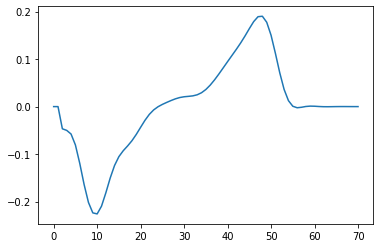

In [ ]:
plt.plot(test_y_plot[15044:15115,4])

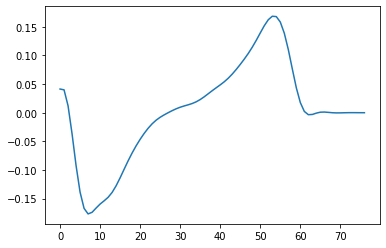

In [ ]:
plt.plot(test_y_plot[0:77,4])

# Important Functions

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
import pickle
from sklearn.linear_model import Ridge
from sklearn.utils import resample




"""# Loss Function"""

from keras import backend as K
def correlation_coefficient_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    # r = K.maximum(K.minimum(r, 1.0), -1.0)

    l1=K.sqrt(K.mean(K.square(y_pred - y_true)))
    #l2=1-K.square(r)
    l2=1-r

    l=l2
    return l

from keras import backend as K
def correlation_coefficient_loss_1(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)

    l1=K.sqrt(K.mean(K.square(y_pred - y_true)))
    l2=1-K.square(r)

    l=l1
    return l

from keras import backend as K
def correlation_coefficient_loss_joint(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    #r = K.maximum(K.minimum(r, 1.0), -1.0)

    l1=K.sqrt(K.mean(K.square(y_pred - y_true)))
    #l2=1-K.square(r)
    l2=1-r

    l=l1+l2
    return l




def RMSE_prediction(yhat_4,test_y,s):

  test_o=test_y.reshape((s,5))
  yhat=yhat_4.reshape((s,5))




  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]
  # y_6_no=yhat[:,5]
  # y_7_no=yhat[:,6]
  #y_8_no=yhat[:,7]
  #y_9_no=yhat[:,8]
  #y_10_no=yhat[:,9]




  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]
  # y_test_6=test_o[:,5]
  # y_test_7=test_o[:,6]
  #y_test_8=test_o[:,7]
  #y_test_9=test_o[:,8]
  #y_test_10=test_o[:,9]





  #print(y_1.shape,y_test_1.shape)



  cutoff=6
  fs=200
  order=4

  nyq = 0.5 * fs
  ## filtering data ##
  def butter_lowpass_filter(data, cutoff, fs, order):
      normal_cutoff = cutoff / nyq
      # Get the filter coefficients
      b, a = butter(order, normal_cutoff, btype='low', analog=False)
      y = filtfilt(b, a, data)
      return y



  y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
  y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
  y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
  y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
  y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
  # y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
  # y_7=butter_lowpass_filter(y_7_no, cutoff, fs, order)
  #y_8=butter_lowpass_filter(y_8_no, cutoff, fs, order)
  #y_9=butter_lowpass_filter(y_9_no, cutoff, fs, order)
  #y_10=butter_lowpass_filter(y_10_no, cutoff, fs, order)




  Z_1=y_1
  Z_2=y_2
  Z_3=y_3
  Z_4=y_4
  Z_5=y_5
  # Z_6=y_6
  # Z_7=y_7
  #Z_8=y_8
  #Z_9=y_9
  #Z_10=y_10



  ###calculate RMSE

  rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
  rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
  rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
  rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
  rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
  # rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
  # rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
  #rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
  #rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100
  #rmse_10 =((np.sqrt(mean_squared_error(y_test_10,y_10)))/(max(y_test_10)-min(y_test_10)))*100


  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)
  # print(rmse_6)
  # print(rmse_7)
  #print(rmse_8)
  #print(rmse_9)
  #print(rmse_10)


  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]
  # p_6=np.corrcoef(y_6, y_test_6)[0, 1]
  # p_7=np.corrcoef(y_7, y_test_7)[0, 1]
  #p_8=np.corrcoef(y_8, y_test_8)[0, 1]
  #p_9=np.corrcoef(y_9, y_test_9)[0, 1]
  #p_10=np.corrcoef(y_10, y_test_10)[0, 1]


  print("\n")
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)
  # print(p_6)
  # print(p_7)
  #print(p_8)
  #print(p_9)
  #print(p_10)


              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])




      #### Mean and standard deviation ####

  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])

      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)

  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

  return rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


def PCC_prediction(yhat_4,test_y,s):

  test_o=test_y.reshape((s,5))
  yhat=yhat_4.reshape((s,5))



  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]
  # y_6_no=yhat[:,5]
  # y_7_no=yhat[:,6]


  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]
  # y_test_6=test_o[:,5]
  # y_test_7=test_o[:,6]



  cutoff=6
  fs=200
  order=4

  nyq = 0.5 * fs
  ## filtering data ##
  def butter_lowpass_filter(data, cutoff, fs, order):
      normal_cutoff = cutoff / nyq
      # Get the filter coefficients
      b, a = butter(order, normal_cutoff, btype='low', analog=False)
      y = filtfilt(b, a, data)
      return y



  y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
  y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
  y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
  y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
  y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
  # y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
  # y_7=butter_lowpass_filter(y_7_no, cutoff, fs, order)


  Y_1=y_1
  Y_2=y_2
  Y_3=y_3
  Y_4=y_4
  Y_5=y_5
  # Y_6=y_6
  # Y_7=y_7


  ###calculate RMSE

  rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
  rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
  rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
  rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
  rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
  # rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
  # rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100


  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)
  # print(rmse_6)
  # print(rmse_7)


  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]
  # p_6=np.corrcoef(y_6, y_test_6)[0, 1]
  # p_7=np.corrcoef(y_7, y_test_7)[0, 1]


  print("\n")
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)
  # print(p_6)
  # print(p_7)



              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])




      #### Mean and standard deviation ####

  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])

      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)

  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


  return rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################



def DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5):

  a_1,b_1=estimate_coef(Y_1,Z_1)
  a_2,b_2=estimate_coef(Y_2,Z_2)
  a_3,b_3=estimate_coef(Y_3,Z_3)
  a_4,b_4=estimate_coef(Y_4,Z_4)
  a_5,b_5=estimate_coef(Y_5,Z_5)

  #### All 16 angles prediction  ####


  test_o=test_y.reshape((s,5))
  yhat=yhat_4.reshape((s,5))


  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]
  # y_6_no=yhat[:,5]
  # y_7_no=yhat[:,6]



  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]
  # y_test_6=test_o[:,5]
  # y_test_7=test_o[:,6]


  cutoff=6
  fs=200
  order=4

  nyq = 0.5 * fs
  ## filtering data ##
  def butter_lowpass_filter(data, cutoff, fs, order):
      normal_cutoff = cutoff / nyq
      # Get the filter coefficients
      b, a = butter(order, normal_cutoff, btype='low', analog=False)
      y = filtfilt(b, a, data)
      return y



  y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
  y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
  y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
  y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
  y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
  # y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
  # y_7=butter_lowpass_filter(y_7_no, cutoff, fs, order)



  y_1=y_1*b_1+a_1
  y_2=y_2*b_2+a_2
  y_3=y_3*b_3+a_3
  y_4=y_4*b_4+a_4
  y_5=y_5*b_5+a_5
  # y_6=y_6*b_6+a_6
  # y_7=y_7*b_7+a_7


  ###calculate RMSE

  rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
  rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
  rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
  rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
  rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
  # rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
  # rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100





  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)
  # print(rmse_6)
  # print(rmse_7)



  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]
  # p_6=np.corrcoef(y_6, y_test_6)[0, 1]
  # p_7=np.corrcoef(y_7, y_test_7)[0, 1]


  print("\n")
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)
  # print(p_6)
  # print(p_7)


              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])



      #### Mean and standard deviation ####

  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])

      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)

  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

  return rmse, p





############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


## Kinetics-FM-Net

In [ ]:
#########################################################################################################################################################################
####################################################   10. Kinetics-Net   ####################################################################
num_pred=5
def Kinetics_FM_Net(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.3)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)

  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.05)(X)

  X=Flatten()(X)

  X=concatenate([X,model_2])


  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.1)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.1)(model_3)
  model_3=Flatten()(model_3)

  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)
  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)

  output_GRU_1=Dense(128,activation='relu')(output_GRU)
  output_GRU_1=Dense(num_pred,activation='sigmoid')(output_GRU_1)
  #output_GRU_1=Dense(1,activation='sigmoid')(output_GRU_1)
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])

  output_C2_1=Dense(128,activation='relu')(output_C2)
  output_C2_1=Dense(num_pred,activation='sigmoid')(output_C2_1)
  #output_C2_1=Dense(1,activation='sigmoid')(output_C2_1)
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])

  output_C1_1=Dense(128,activation='relu')(output_C1)
  output_C1_1=Dense(num_pred,activation='sigmoid')(output_C1_1)
  #output_C1_1=Dense(1,activation='sigmoid')(output_C1_1)
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])


  weight=output_GRU_1+output_C2_1+output_C1_1

  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])


  output = output_GRU_2+output_C1_2+output_C2_2


  return (output_C1,output_C2,output_GRU,output)


def Kinetics_FM_Net_pcc(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.25)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.25)(model_1)
  model_1=Flatten()(model_1)

  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  # X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  # X=Dropout(0.05)(X)

  X=Flatten()(X)
  X=concatenate([X,model_2])


  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)
  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)


  output_GRU_1=Dense(128,activation='relu')(output_GRU)
  output_GRU_1=Dropout(0.4)(output_GRU_1)
  #output_GRU_1=Dense(64,activation='relu')(output_GRU_1)
  output_GRU_1=Dense(num_pred,activation='sigmoid')(output_GRU_1)
  #output_GRU_1=Dense(1,activation='sigmoid')(output_GRU_1)
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])

  output_C2_1=Dense(128,activation='relu')(output_C2)
  output_C2_1=Dropout(0.4)(output_C2_1)
  #output_C2_1=Dense(64,activation='relu')(output_C2_1)
  output_C2_1=Dense(num_pred,activation='sigmoid')(output_C2_1)
  #output_C2_1=Dense(1,activation='sigmoid')(output_C2_1)
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])

  output_C1_1=Dense(128,activation='relu')(output_C1)
  output_C1_1=Dropout(0.4)(output_C1_1)
  #output_C1_1=Dense(64,activation='relu')(output_C1_1)
  output_C1_1=Dense(num_pred,activation='sigmoid')(output_C1_1)
  #output_C1_1=Dense(1,activation='sigmoid')(output_C1_1)
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])


  weight=output_GRU_1+output_C2_1+output_C1_1

  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])

  output = output_GRU_2+output_C1_2+output_C2_2

  return (output_C1,output_C2,output_GRU,output)


# Model Training

## Early Stopping

In [ ]:
custom_early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=15,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

## Kinetics-FM-Net

In [ ]:
def Results_output(sensor_number,Features,sensor,train_X_1D,train_X_2D,X_validation_1D,X_validation_2D,test_X_1D,test_X_2D):

  inputs_1D = tf.keras.layers.Input(shape=(w,Features))
  inputs_2D = tf.keras.layers.Input(shape=(w,6,sensor))


  inputs_1D_N=BatchNormalization()(inputs_1D)
  inputs_2D_N=BatchNormalization()(inputs_2D)


  output_1,output_2,output_3,output=Kinetics_FM_Net(inputs_1D_N,inputs_2D_N)

  model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])

  model_1.compile(loss=correlation_coefficient_loss_1, optimizer=opt, metrics=[correlation_coefficient_loss_1])


  history=model_1.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                            [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])



  model_1.save(path+'model_Kinetics_FM_'+sensor_number+'.h5')


  gc.collect()


  [yhat_1,yhat_2,yhat_3,yhat_4] = model_1.predict([test_X_1D,test_X_2D])


  rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


  gc.collect()

  RMSE_Kinetics_FM=rmse
  PCC_Kinetics_FM=p


  output_1,output_2,output_3,output=Kinetics_FM_Net_pcc(inputs_1D_N,inputs_2D_N)
  model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])


  model_2.compile(loss=correlation_coefficient_loss, optimizer=opt, metrics=[correlation_coefficient_loss])


  history=model_2.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=55, batch_size=64, validation_data=([X_validation_1D,X_validation_2D],\
                                                                                          [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])


  model_2.save(path+'model_Kinetics_FM_PCC_'+sensor_number+'.h5')

  gc.collect()

  [yhat_1,yhat_2,yhat_3,yhat_4] = model_2.predict([test_X_1D,test_X_2D])

  rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_y,s)
  rmse,p=DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)


  RMSE_Kinetics_FM_DLR=rmse
  PCC_Kinetics_FM_DLR=p

  gc.collect()
  gc.collect()
  gc.collect()
  gc.collect()

  return RMSE_Kinetics_FM_DLR, PCC_Kinetics_FM_DLR

In [ ]:
RMSE_Kinetics_FM_DLR_1, PCC_Kinetics_FM_DLR_1=Results_output('1',6,1,train_X_1D[:,:,0:6],train_X_2D[:,:,:,0:1],X_validation_1D[:,:,0:6],\
                                                         X_validation_2D[:,:,:,0:1],test_X_1D[:,:,0:6],test_X_2D[:,:,:,0:1])

RMSE_Kinetics_FM_DLR_2, PCC_Kinetics_FM_DLR_2=Results_output('2',6,1,train_X_1D[:,:,6:12],train_X_2D[:,:,:,1:2],X_validation_1D[:,:,6:12],\
                                                         X_validation_2D[:,:,:,1:2],test_X_1D[:,:,6:12],test_X_2D[:,:,:,1:2])

RMSE_Kinetics_FM_DLR_3, PCC_Kinetics_FM_DLR_3=Results_output('3',6,1,train_X_1D[:,:,12:18],train_X_2D[:,:,:,2:3],X_validation_1D[:,:,12:18],\
                                                         X_validation_2D[:,:,:,2:3],test_X_1D[:,:,12:18],test_X_2D[:,:,:,2:3])

RMSE_Kinetics_FM_DLR_4, PCC_Kinetics_FM_DLR_4=Results_output('4',12,2,train_X_1D[:,:,0:12],train_X_2D[:,:,:,0:2],X_validation_1D[:,:,0:12],\
                                                         X_validation_2D[:,:,:,0:2],test_X_1D[:,:,0:12],test_X_2D[:,:,:,0:2])

RMSE_Kinetics_FM_DLR_5, PCC_Kinetics_FM_DLR_5=Results_output('5',12,2,train_X_1D[:,:,6:18],train_X_2D[:,:,:,1:3],X_validation_1D[:,:,6:18],\
                                                         X_validation_2D[:,:,:,1:3],test_X_1D[:,:,6:18],test_X_2D[:,:,:,1:3])


train_X_1D_6=np.concatenate((train_X_1D[:,:,0:6],train_X_1D[:,:,12:18]),axis=-1)
X_validation_1D_6=np.concatenate((X_validation_1D[:,:,0:6],X_validation_1D[:,:,12:18]),axis=-1)
test_X_1D_6=np.concatenate((test_X_1D[:,:,0:6],test_X_1D[:,:,12:18]),axis=-1)


train_X_2D_6=np.concatenate((train_X_2D[:,:,:,0:1],train_X_2D[:,:,:,2:3]),axis=-1)
X_validation_2D_6=np.concatenate((X_validation_2D[:,:,:,0:1],X_validation_2D[:,:,:,2:3]),axis=-1)
test_X_2D_6=np.concatenate((test_X_2D[:,:,:,0:1],test_X_2D[:,:,:,2:3]),axis=-1)

RMSE_Kinetics_FM_DLR_6, PCC_Kinetics_FM_DLR_6=Results_output('6',12,2,train_X_1D_6,train_X_2D_6,X_validation_1D_6,\
                                                         X_validation_2D_6,test_X_1D_6,test_X_2D_6)

ablation_1=np.hstack([RMSE_Kinetics_FM_DLR_1, PCC_Kinetics_FM_DLR_1])
ablation_2=np.hstack([RMSE_Kinetics_FM_DLR_2, PCC_Kinetics_FM_DLR_2])
ablation_3=np.hstack([RMSE_Kinetics_FM_DLR_3, PCC_Kinetics_FM_DLR_3])
ablation_4=np.hstack([RMSE_Kinetics_FM_DLR_4, PCC_Kinetics_FM_DLR_4])
ablation_5=np.hstack([RMSE_Kinetics_FM_DLR_5, PCC_Kinetics_FM_DLR_5])
ablation_6=np.hstack([RMSE_Kinetics_FM_DLR_6, PCC_Kinetics_FM_DLR_6])

## Result Summary

In [ ]:
All_result=np.vstack([ablation_1,ablation_2,ablation_3,ablation_4,ablation_5,ablation_6])

from numpy import savetxt

savetxt(path+subject+'_Sensor_combination_results.csv', All_result, delimiter=',')